# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [ ]:
# you are free to use any package you deem fit

## Dataset

In [1]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import warnings


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)



LogisticRegression()

## Testing / Optimization

In [3]:
# Score the model on the test data
log_reg_score = log_reg.score(X_test, y_test)
print('Logistic Regression score: ', log_reg_score)

# Instantiate and train the MLPClassifier
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)

# Score the MLPC model on the test data
mlp_clf_score = mlp_clf.score(X_test, y_test)
print('MLP Classifier score: ', mlp_clf_score)

# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

Logistic Regression score:  0.944
MLP Classifier score:  0.96


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Performance Analysis

/tmp/ipykernel_404/3943382289.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


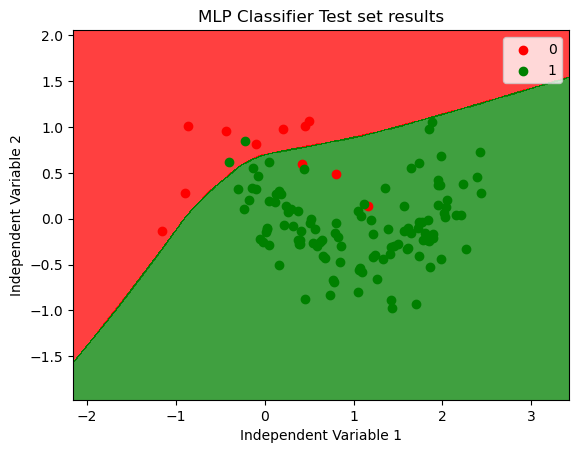

In [4]:
plt.contourf(X1, X2, mlp_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('MLP Classifier Test set results')
plt.xlabel('Independent Variable 1')
plt.ylabel('Independent Variable 2')
plt.legend()
plt.show()